Importaciones

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

Leer los datos

In [43]:
# Función para leer datos desde un archivo txt con formato "x y"
def ReadData(filename):
    x_data, y_data = [], []
    with open(filename, "r") as file:
        for line in file:
            x_val, y_val = map(float, line.split())  # Separa valores por espacios
            x_data.append(x_val)
            y_data.append(y_val)
    return np.array(x_data), np.array(y_data)

# Leer datos desde el archivo
x, y = ReadData("Datos_Grupo_3.txt")  # Archivo con valores de x e y en columnas

Apartado a

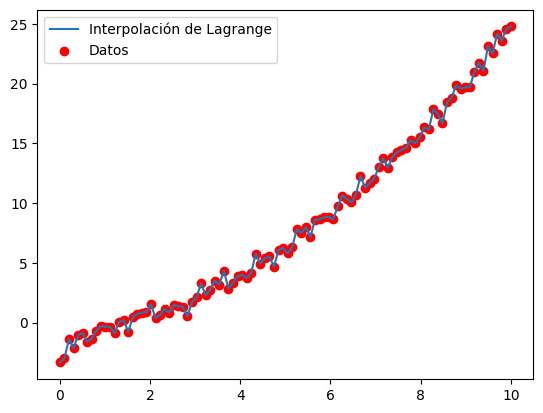

In [44]:
def lagrange_interpolation(x_data, y_data, x_interp):
    def basis(j, x_point):
        term = [(x_point - x_data[m]) / (x_data[j] - x_data[m]) for m in range(len(x_data)) if m != j]
        return np.prod(term, axis=0)
    return sum(y_data[j] * basis(j, x_interp) for j in range(len(x_data)))

x_interp = np.linspace(min(x), max(x), 100)
y_interp = lagrange_interpolation(x, y, x_interp)

plt.plot(x_interp, y_interp, label='Interpolación de Lagrange')
plt.scatter(x, y, color='red', label='Datos')
plt.legend()
plt.show()

Apartado b

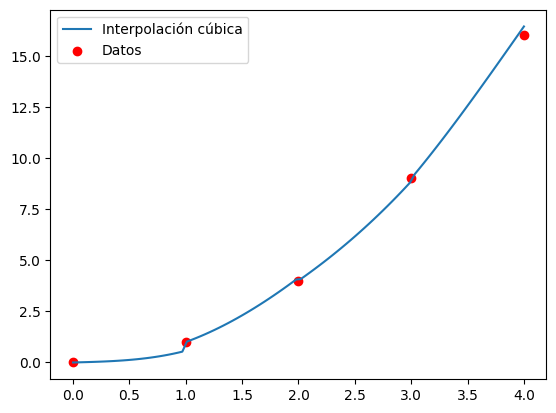

In [ ]:
def cubic_spline_interpolation(x_data, y_data, x_interp):
    p = Polynomial.fit(x_data, y_data, deg=min(len(x_data)-1, 3))
    return p(x_interp)

y_spline = cubic_spline_interpolation(x, y, x_interp)

plt.plot(x_interp, y_spline, label='Interpolación cúbica')
plt.scatter(x, y, color='red', label='Datos')
plt.legend()
plt.show()

Apartado c

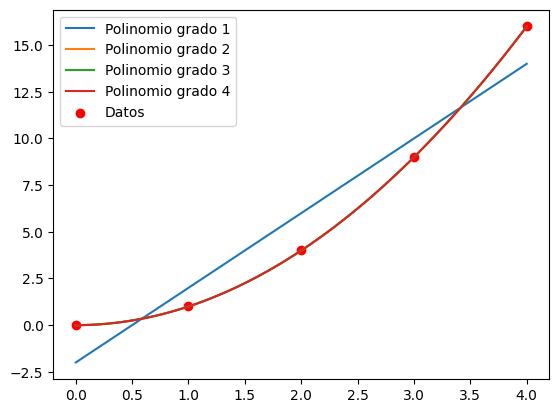

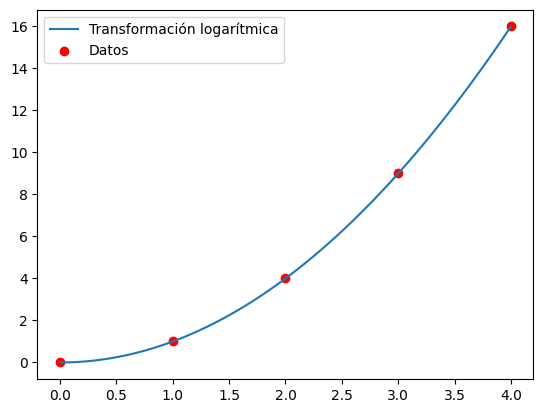

In [46]:
x_interp = np.linspace(min(x), max(x), 100)

# Ajuste polinomial de grado 1 a 4
for degree in range(1, 5):
    coeffs = np.polyfit(x, y, degree)
    poly_func = np.poly1d(coeffs)
    y_fit = poly_func(x_interp)
    plt.plot(x_interp, y_fit, label=f'Polinomio grado {degree}')

plt.scatter(x, y, color='red', label='Datos')
plt.legend()
plt.show()

# --------------------------
# TRANSFORMACIÓN LOGARÍTMICA
# --------------------------
# Filtrar valores positivos
mask = (x > 0) & (y > 0)  # Evita logaritmos de números no válidos
x_log = np.log(x[mask])
y_log = np.log(y[mask])

# Verificar que la transformación no generó NaN o Inf
if np.any(np.isnan(x_log)) or np.any(np.isnan(y_log)):
    raise ValueError("Se encontraron valores NaN después de la transformación logarítmica.")

# Ajuste lineal en escala log-log
coeffs_log = np.polyfit(x_log, y_log, 1)
y_transformed = np.exp(coeffs_log[1]) * x_interp ** coeffs_log[0]

plt.plot(x_interp, y_transformed, label='Transformación logarítmica')
plt.scatter(x, y, color='red', label='Datos')
plt.legend()
plt.show()


Apartado d

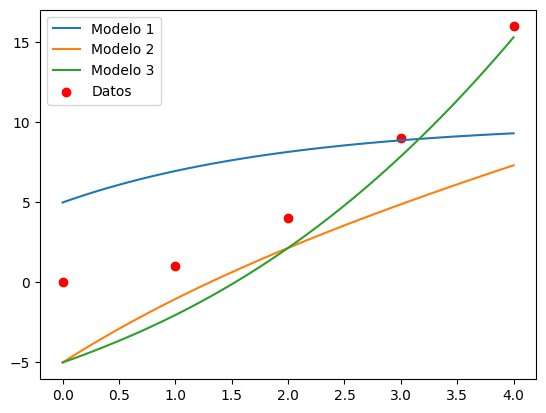

In [47]:
def model_1(x, a0, a1, a2):
    return a0 - a1 * np.exp(-a2 * x)

def model_2(x, a0, a1, a2):
    return a0 * x - a1 * np.exp(-a2 * x)

def model_3(x, a0, a1, a2):
    return a0 * x**2 - a1 * np.exp(-a2 * x)

plt.plot(x_interp, model_1(x_interp, 10, 5, 0.5), label='Modelo 1')
plt.plot(x_interp, model_2(x_interp, 2, 5, 0.5), label='Modelo 2')
plt.plot(x_interp, model_3(x_interp, 1, 5, 0.5), label='Modelo 3')
plt.scatter(x, y, color='red', label='Datos')
plt.legend()
plt.show()